<a href="https://colab.research.google.com/github/nickfiddler/FiddlerCodingPortfolio/blob/main/LifeExpectancyLinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is focused purley on prediciting the life expectancy of a country based off of several different factors. I retrieved the data set from Kaggle: https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated/data. The factors I will be choosing to create my linear models will be those with R2 values above .5 and then grouping them together by similar factors. The first step is to retrieve the csv file from my computer and read it as a data frame.

In [1]:
from google.colab import files
file = files.upload()

Saving Life-Expectancy-Data-Updated.csv to Life-Expectancy-Data-Updated.csv


In [3]:
import pandas as pd

file_name = 'Life-Expectancy-Data-Updated.csv'
df = pd.read_csv(file_name)
df

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


The next step is to make a correlation matrix and then one that just shows how each factor correlates to life expectancy.

In [4]:
df_all_nums = df.apply(pd.to_numeric,errors = 'coerce')
life_corr = df_all_nums.corr()
life_corr

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,NaN,1.000000e+00,-0.172402,-0.176393,-0.158660,-0.000611,0.176824,0.085945,0.161422,...,0.145143,-0.081743,0.040998,0.015158,-0.044901,-0.048038,0.150539,-5.026601e-15,4.975598e-15,0.174359
Infant_deaths,NaN,NaN,-1.724017e-01,1.000000,0.985651,0.794661,-0.454526,-0.512562,-0.526282,-0.661988,...,-0.721875,0.349458,-0.512286,0.007622,0.491192,0.477639,-0.788513,-4.758662e-01,4.758662e-01,-0.920032
Under_five_deaths,NaN,NaN,-1.763926e-01,0.985651,1.000000,0.802361,-0.409367,-0.507427,-0.512972,-0.665255,...,-0.725355,0.369618,-0.469682,-0.005234,0.466978,0.450756,-0.773196,-4.271342e-01,4.271342e-01,-0.920419
Adult_mortality,NaN,NaN,-1.586596e-01,0.794661,0.802361,1.000000,-0.244794,-0.344882,-0.416153,-0.522866,...,-0.513803,0.699119,-0.510121,-0.053848,0.382140,0.379792,-0.581035,-4.293748e-01,4.293748e-01,-0.945360
Alcohol_consumption,NaN,NaN,-6.105222e-04,-0.454526,-0.409367,-0.244794,1.000000,0.168436,0.318603,0.284032,...,0.299016,-0.034118,0.443966,-0.039119,-0.446366,-0.433030,0.615728,6.703661e-01,-6.703661e-01,0.399159
Hepatitis_B,NaN,NaN,1.768241e-01,-0.512562,-0.507427,-0.344882,0.168436,1.000000,0.429168,0.345421,...,0.761780,-0.075782,0.159375,-0.082396,-0.208453,-0.213794,0.347643,1.135340e-01,-1.135340e-01,0.417804
Measles,NaN,NaN,8.594472e-02,-0.526282,-0.512972,-0.416153,0.318603,0.429168,1.000000,0.416321,...,0.494059,-0.150580,0.313724,-0.098222,-0.340705,-0.366970,0.498391,2.986933e-01,-2.986933e-01,0.490019
BMI,NaN,NaN,1.614225e-01,-0.661988,-0.665255,-0.522866,0.284032,0.345421,0.416321,1.000000,...,0.426501,-0.161142,0.336180,-0.166482,-0.596483,-0.599112,0.635475,2.432870e-01,-2.432870e-01,0.598423


In [6]:
life_expectR = life_corr['Life_expectancy'].sort_values(ascending=False)
life_expectR

,Life_expectancy
Life_expectancy,1.000000
Schooling,0.732484
Polio,0.641217
Diphtheria,0.627541
BMI,0.598423
GDP_per_capita,0.583090
Economy_status_Developed,0.523791
Measles,0.490019
Hepatitis_B,0.417804
Alcohol_consumption,0.399159


This step is for finding R2 related to life expectancy.

In [8]:
import numpy as np
life_r2 = np.square(life_expectR).sort_values(ascending = False)
life_r2

,Life_expectancy
Life_expectancy,1.000000
Adult_mortality,0.893706
Under_five_deaths,0.847171
Infant_deaths,0.846459
Schooling,0.536533
Polio,0.411160
Diphtheria,0.393808
BMI,0.358110
GDP_per_capita,0.339994
Incidents_HIV,0.305839


Finally, I am taking the 4 statistics that have an R2 of above .5 and creating a scatter matrix of them. Technically, we just need to look at the top row, but is also interesting to see how each are related to each other.

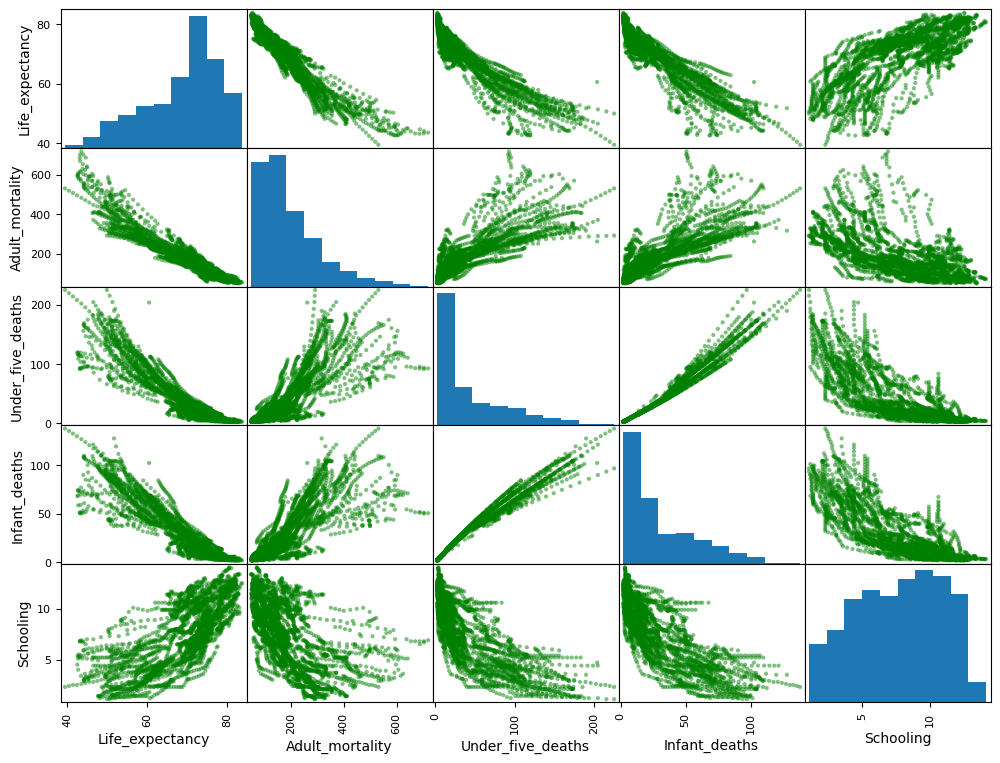

In [13]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

attributes = ['Life_expectancy','Adult_mortality','Under_five_deaths','Infant_deaths','Schooling']
scatter_matrix(df[attributes], figsize=(12,9), color = 'Green')
plt.show()

Now it is time to make my linear regression models. The first model will be of the three statistics which have an R2 of above .84

In [17]:
from sklearn.linear_model import LinearRegression
X = df[['Adult_mortality','Under_five_deaths','Infant_deaths']]
y = df[['Life_expectancy']]

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([82.61503576]), array([[-0.04720402, -0.01904991, -0.12732052]]))

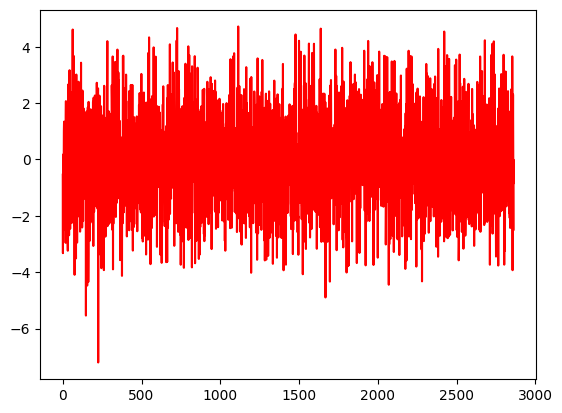

In [19]:
predict = lin_reg.predict(X)
p = predict - y
plt.plot(p, color = "Red")

In [20]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y,predict))
rmse

1.5947440306211667

Just using three statistics, we are able to get within on average 1.6 year of life expectancy. Next, we are going to train a model that includes schooling as that R2 value was above .5.

In [21]:
X2 = df[['Adult_mortality','Under_five_deaths','Infant_deaths','Schooling']]

lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)
lin_reg2.intercept_,lin_reg2.coef_

(array([79.90585309]),
 array([[-0.04809578, -0.02018761, -0.09820912,  0.2680178 ]]))

In [22]:
predict2 = lin_reg2.predict(X2)
rmse2 = np.sqrt(mean_squared_error(y,predict2))
rmse2

1.508024643319651

Just barely, but when you add schooling it generates a better model. My next modlel will be related to factors that are not related stricting to death like adult mortality, under five deaths, and infant deaths are

In [23]:
X3 = df[['Schooling','BMI','GDP_per_capita']]

lin_reg3 = LinearRegression()
lin_reg3.fit(X3,y)
lin_reg3.intercept_,lin_reg3.coef_

(array([31.9565153]),
 array([[1.29606008e+00, 1.01494325e+00, 1.38712541e-04]]))

In [25]:
predict3 = lin_reg3.predict(X3)
rmse3 = np.sqrt(mean_squared_error(y,predict3))
rmse3

5.892198083615598

Finally, I will be using the statistics related to diseases to create a model.

In [26]:
X4 = df[['Polio','Diphtheria','Incidents_HIV']]

lin_reg4 = LinearRegression()
lin_reg4.fit(X4,y)
lin_reg4.intercept_,lin_reg4.coef_

(array([39.52497072]), array([[ 0.26847164,  0.0899451 , -1.84650834]]))

In [27]:
predict4 = lin_reg4.predict(X4)
rmse4 = np.sqrt(mean_squared_error(y,predict4))
rmse4

5.737316449150478

The best model that was created here was the three statistics related to death and schooling. I am goigng to take that model and make a df with predictions compared to y value.

In [29]:
country_and_year = df[["Country","Year","Life_expectancy"]]
predictions_df = pd.DataFrame(predict2, columns = ["Predictions"])
final_pred_DF = pd.concat([country_and_year,predictions_df], axis = 1)
final_pred_DF["Predictions"] = final_pred_DF["Predictions"].round(1)
final_pred_DF

,Country,Year,Life_expectancy,Predictions
0,Turkiye,2015,76.5,71.8
1,Spain,2015,82.8,74.5
2,India,2007,65.4,60.1
3,Guyana,2006,67.0,68.4
4,Israel,2012,81.7,80.7
...,...,...,...,...
2859,Niger,2000,49.9,54.5
2860,Mongolia,2009,66.9,69.8
2861,Sri Lanka,2004,74.3,67.8
2862,Lithuania,2002,71.8,73.9


Please feel free to scroll trough the predictions vs the actual life expectancy. As we can tell, this model does a half decent job predicting the life expectancy given schooling, adult mortality, under five deaths, and infant deaths. Unfortunately, this gives a good indication that the greatest predictor of life expectancy is other deaths.